# Introduction
This lab is aim at building a multi-layer perceptron (MLP) model from scratch so that we could know some essential issues of designing a neural network based model. This MLP model would be applied on both linearly separable data and non-linearly separable data to achieve binary classification task.

# Experimental Setup
We apply a shallow neural network model with vanilla gradient descent on non-linearly separable (XOR) data and linearly separable data, attempting to classify data into 2 predefined class. To assure generalizablility, we sampled 60 points & 20 points from normal distribution with $\mu=0, \sigma=1$ for training and testing dataset, respectively. The maximum number of epochs is set to 10,0000, and there is a premature stop mechanism if loss is less than 0.0001, which means all data point are correctly classified. Learning rate is set to be 0.1 and 0.5 to see different results. Loss function is choose to be Mean-Squared-Error due to simplicity. 

## Sigmoid functions
We often use an non-linear function such as sigmoid function or ReLU (Rectified Linear Unit) after each neuron. Activation function simulates the behavior of natural neurons, which makes neurons are activated sometimes, others might be dead. This kind of operation introduces non-linearity in our model, which improve the capability of models.

* $\sigma(x) = \dfrac{1}{1+e^{-x}}$
* $\sigma'(x) = \sigma(x)(1-\sigma(x))$

## Neural network
Neural Network(NN) is a representation learning model, also known as multi-layer perceptron(MLP), which is a bunch of linear classifiers. With many neurons in each layer, we could capture different types of feature or pattern in the input. With many layers in the network, we could aggregate some simple features into much more complex features. A neural network could learn an abstract representation of some input data by searching for the optimal weights. Nowadays NN-based models are usually using gradient descent based optimizing strategy so that our search space should be smooth, or sometimes might be Lipschitz continuous.

## Back-propagation
Back-propagation is the critical technique that makes neural network become computationally efficient. To update derivative of each training step might cost huge effort. We could divide the derivative of whole network into a multiplication of many small derivatives of each neuron by chain rules. Then it is easy to calculate those small derivatives from the end of network, and to propagate them back to the begin layer by layer.

## Loss function
Most of Machine Learning tasks could be formulated into an optimization task, which is defined in some search space of parameters with the optimizing direction indicated by a loss function. I choose "half "of MSE to make derivative of loss much simpler.

* Mean-Square-Error 
    * $L(\theta) = \frac{1}{2}(y-\hat{y})^2, ~~ \hat{y} = f_{w,\theta}(x), ~~f~\text{ represents the whole neural network}$
    * $L'(\theta) = (y-\hat{y})$

# Experimental Result

## Utils

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from GenData import GenData

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def der_sigmoid(y):
    return y * (1 - y)

def loss(y_true, y_pred):
    return np.mean(0.5 * (y_true - y_pred)**2)
    
def derivative_loss(y_true, y_pred):
    return (y_true - y_pred)

## Layer Class

In [ ]:
class layer():
    def __init__(self, fan_in, fan_out, act='sigmoid'):
        self.w = np.random.normal(0, 1, (fan_in+1, fan_out))
        if act == 'sigmoid':
            self.act = sigmoid
            self.der_act = der_sigmoid
        else:
            self.act = ReLU
            self.der_act = der_ReLU
        
        
    def forward(self, x):
        x = np.c_[x, np.ones((x.shape[0],1))]
        self.forward_gradient = x
        self.y = self.act(x @ self.w)
        return self.y
    
    def backward(self, derivative_C):
        self.backward_gradient =  self.der_act(self.y) *  derivative_C
        return self.backward_gradient @self.w[:-1].T

    def update(self, learning_rate):
        self.gradient = self.forward_gradient.T @ self.backward_gradient
        self.w -= learning_rate*self.gradient
        return self.gradient

## SimpleNet Class

In [47]:
class SimpleNet():
    def __init__(self, dim, learning_rate = 0.1, act='sigmoid'):
        self.learning_rate = learning_rate
        
        if act == 'sigmoid':
            self.act = sigmoid
            self.der_act = der_sigmoid
        else:
            self.act = ReLU
            self.der_act = der_ReLU
        
        self.layers = []
        for fan_in, fan_out in zip(dim, dim[1:] + [0]):
            if fan_out == 0:
                break
            self.layers += [layer(fan_in, fan_out, act)]
            
    @staticmethod
    def plot_result(data, y_true, y_pred):
        """ Data visualization with ground truth and predicted data comparison. There are two plots
        for them and each of them use different colors to differentiate the data with different labels.

        Args:
            data:   the input data
            y_true:   ground truth to the data
            y_pred: predicted results to the data
        """
        assert data.shape[0] == y_true.shape[0]
        assert data.shape[0] == y_pred.shape[0]

        plt.figure(figsize=(8,4))

        plt.subplot(1, 2, 1)
        plt.title('Ground Truth', fontsize=18)

        for idx in range(data.shape[0]):
            if y_true[idx] == 0:
                plt.plot(data[idx][0], data[idx][1], 'ro')
            else:
                plt.plot(data[idx][0], data[idx][1], 'bo')

        plt.subplot(1, 2, 2)
        plt.title('Prediction', fontsize=18)

        for idx in range(data.shape[0]):
            if y_pred[idx] == 0:
                plt.plot(data[idx][0], data[idx][1], 'ro')
            else:
                plt.plot(data[idx][0], data[idx][1], 'bo')

        plt.show()
        
        
    def forward(self, x):
        _x = x
        for l in self.layers:
            _x = l.forward(_x)
        return _x
    
    def backward(self, dC):
        _dC = dC
        for l in reversed(self.layers):
            _dC = l.backward(_dC)
            
        gradients = []
        for l in self.layers:
            gradients += [l.update(self.learning_rate)]
        return gradients
    
    def train(self, X, y_true, epochs=100000, threshold=0.01):
        convergence = False
        for i in range(epochs):
            if not convergence:
                y = self.forward(X)
                error = loss(y, y_true)
                self.backward(derivative_loss(y, y_true))

                if error < threshold:
                    print('coverged')
                    convergence = True


            if i%5000 == 0 or (convergence):
                print( '[{:4d}] loss : {:.4f} '.format(i, error))

            if convergence:
                break

## Main function
* Set NN with 2 hidden layers with both 4 neurons.
* The scatter plot is only for testing dataset, since training dataset should be classifed total correctly.


### learning rate = 0.1
* Both XOR and Linear data are classifed total correctly.

[   0] loss : 0.1437 
[5000] loss : 0.0049 
[10000] loss : 0.0051 
[15000] loss : 0.0003 
coverged
[18931] loss : 0.0001 
=============== XOR ===============
train loss :  9.997208158426372e-05
train accuracy : 100.00%
------------------------------
test loss :  9.997208158426372e-05
test accuracy : 100.00%


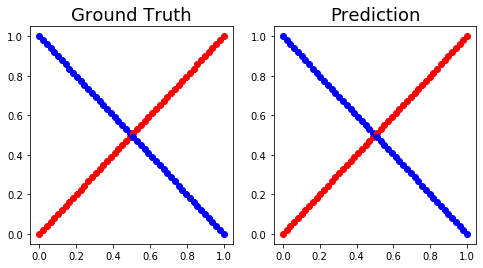

[   0] loss : 0.1267 
[5000] loss : 0.0002 
coverged
[7593] loss : 0.0001 
=============== Linear ===============
train loss :  9.995223196059591e-05
train accuracy : 100.00%
------------------------------
test loss :  0.01060095034502935
test accuracy : 97.00%


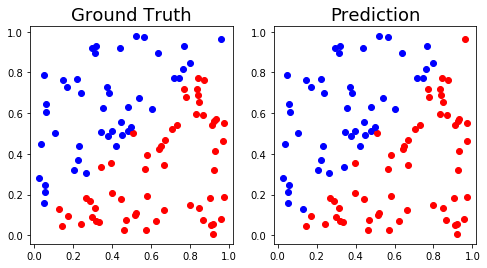

In [50]:
# learning rate = 0.1
if __name__ == "__main__":
    data_type = ['XOR', 'Linear']
    for d in data_type:
    
        X_train, y_train = GenData.fetch_data(d, 60)
        X_test, y_test = GenData.fetch_data(d, 20)

        net = SimpleNet([2,4, 4, 1], learning_rate=0.1)
        net.train(X_train, y_train, threshold=0.0001)
        
        print('='*15, d, '='*15)
        
        # Training (data leakage)
        y_pred = net.forward(X_train)
        print('train loss : ', loss(y_pred, y_train))
        print('train accuracy : {:.2f}%'.format(np.count_nonzero(np.round(y_pred) == y_train) * 100 / len(y_pred)))
        
        print('-' * 30)
        
        # Testing
        y_pred = net.forward(X_test)
        print('test loss : ', loss(y_pred, y_test))
        print('test accuracy : {:.2f}%'.format(np.count_nonzero(np.round(y_pred) == y_test) * 100 / len(y_pred)))
        SimpleNet.plot_result(X_test, y_test, np.round(y_pred))

### learning rate = 0.5
* Learning rate is too high so that loss could not coverge.
* It is obvious that values of data is ranged from 0 to 1, and learning rate=0.5, which makes the search process still coarse-grained and far from the optimum.

[   0] loss : 0.2019 
[5000] loss : 0.1608 
[10000] loss : 0.1118 
[15000] loss : 0.0961 
[20000] loss : 0.0858 
[25000] loss : 0.1161 
[30000] loss : 0.1023 
[35000] loss : 0.1306 
[40000] loss : 0.1282 
[45000] loss : 0.1198 
[50000] loss : 0.1251 
[55000] loss : 0.1044 
[60000] loss : 0.0900 
[65000] loss : 0.0856 
[70000] loss : 0.1036 
[75000] loss : 0.1253 
[80000] loss : 0.1565 
[85000] loss : 0.1077 
[90000] loss : 0.0855 
[95000] loss : 0.1133 
=============== XOR ===============
train loss :  0.09772518458155059
train accuracy : 74.00%
------------------------------
test loss :  0.09772518458155059
test accuracy : 74.00%


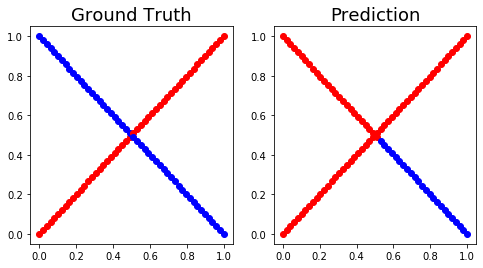

[   0] loss : 0.1476 
coverged
[2663] loss : 0.0001 
=============== Linear ===============
train loss :  9.947595068277803e-05
train accuracy : 100.00%
------------------------------
test loss :  0.008244224160759971
test accuracy : 97.00%


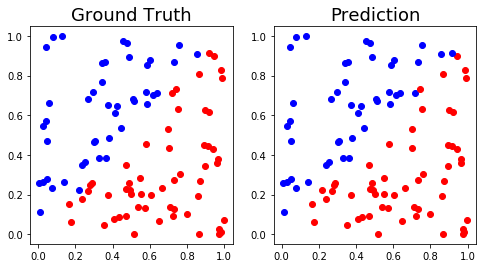

In [51]:
# learning rate = 0.5
if __name__ == "__main__":
    data_type = ['XOR', 'Linear']
    for d in data_type:
    
        X_train, y_train = GenData.fetch_data(d, 60)
        X_test, y_test = GenData.fetch_data(d, 20)

        net = SimpleNet([2,4, 4, 1], learning_rate=0.5)
        net.train(X_train, y_train, threshold=0.0001)
        
        print('='*15, d, '='*15)
        
        # Training (data leakage)
        y_pred = net.forward(X_train)
        print('train loss : ', loss(y_pred, y_train))
        print('train accuracy : {:.2f}%'.format(np.count_nonzero(np.round(y_pred) == y_train) * 100 / len(y_pred)))
        
        print('-' * 30)
        
        # Testing
        y_pred = net.forward(X_test)
        print('test loss : ', loss(y_pred, y_test))
        print('test accuracy : {:.2f}%'.format(np.count_nonzero(np.round(y_pred) == y_test) * 100 / len(y_pred)))
        SimpleNet.plot_result(X_test, y_test, np.round(y_pred))

# Discussion and extra experiments
Try fewer or more layers to see different results.

## Fewer layers
### 1 hidden layer with 4 neurons
* Need more training epochs to achieve same accuracy with 2 hidden layers.

[   0] loss : 0.1303 
[5000] loss : 0.0083 
[10000] loss : 0.0061 
[15000] loss : 0.0051 
[20000] loss : 0.0045 
[25000] loss : 0.0041 
[30000] loss : 0.0039 
[35000] loss : 0.0037 
[40000] loss : 0.0036 
[45000] loss : 0.0034 
[50000] loss : 0.0033 
[55000] loss : 0.0032 
[60000] loss : 0.0030 
[65000] loss : 0.0029 
[70000] loss : 0.0028 
[75000] loss : 0.0027 
[80000] loss : 0.0025 
[85000] loss : 0.0024 
[90000] loss : 0.0022 
[95000] loss : 0.0020 
=============== XOR ===============
train loss :  0.0018742838468524593
train accuracy : 100.00%
------------------------------
test loss :  0.0018742838468524593
test accuracy : 100.00%


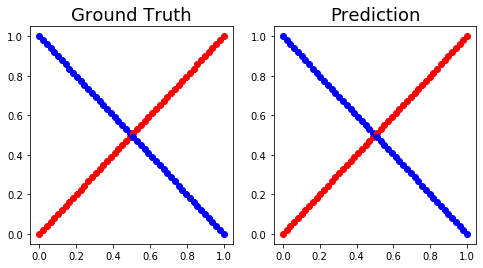

[   0] loss : 0.1498 
[5000] loss : 0.0016 
[10000] loss : 0.0007 
[15000] loss : 0.0004 
[20000] loss : 0.0002 
[25000] loss : 0.0002 
[30000] loss : 0.0001 
[35000] loss : 0.0001 
coverged
[36684] loss : 0.0001 
=============== Linear ===============
train loss :  9.999308786044546e-05
train accuracy : 100.00%
------------------------------
test loss :  0.013098278594447755
test accuracy : 97.00%


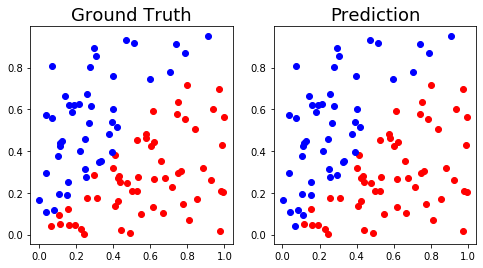

In [52]:
# learning rate = 0.1
if __name__ == "__main__":
    data_type = ['XOR', 'Linear']
    for d in data_type:
    
        X_train, y_train = GenData.fetch_data(d, 60)
        X_test, y_test = GenData.fetch_data(d, 20)

        net = SimpleNet([2,4, 1], learning_rate=0.1)
        net.train(X_train, y_train, threshold=0.0001)
        
        print('='*15, d, '='*15)
        
        # Training (data leakage)
        y_pred = net.forward(X_train)
        print('train loss : ', loss(y_pred, y_train))
        print('train accuracy : {:.2f}%'.format(np.count_nonzero(np.round(y_pred) == y_train) * 100 / len(y_pred)))
        
        print('-' * 30)
        
        # Testing
        y_pred = net.forward(X_test)
        print('test loss : ', loss(y_pred, y_test))
        print('test accuracy : {:.2f}%'.format(np.count_nonzero(np.round(y_pred) == y_test) * 100 / len(y_pred)))
        SimpleNet.plot_result(X_test, y_test, np.round(y_pred))

### 1 hidden layer with 30 neurons
* Might need more training epochs than 1 hidden layer with 4 neurons due to more weights to be trained

[   0] loss : 0.2485 
[5000] loss : 0.0084 
[10000] loss : 0.0063 
[15000] loss : 0.0052 
[20000] loss : 0.0047 
[25000] loss : 0.0043 
[30000] loss : 0.0040 
[35000] loss : 0.0038 
[40000] loss : 0.0037 
[45000] loss : 0.0035 
[50000] loss : 0.0034 
[55000] loss : 0.0033 
[60000] loss : 0.0031 
[65000] loss : 0.0030 
[70000] loss : 0.0029 
[75000] loss : 0.0027 
[80000] loss : 0.0026 
[85000] loss : 0.0025 
[90000] loss : 0.0023 
[95000] loss : 0.0021 
=============== XOR ===============
train loss :  0.0019815393448893654
train accuracy : 100.00%
------------------------------
test loss :  0.0019815393448893654
test accuracy : 100.00%


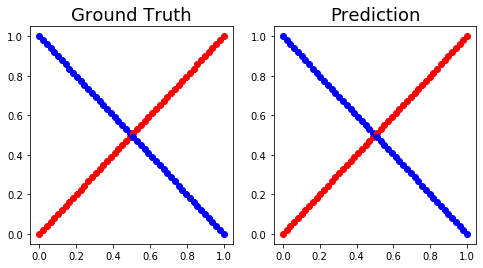

[   0] loss : 0.2471 
[5000] loss : 0.0013 
[10000] loss : 0.0006 
[15000] loss : 0.0003 
[20000] loss : 0.0002 
[25000] loss : 0.0002 
[30000] loss : 0.0001 
coverged
[34906] loss : 0.0001 
=============== Linear ===============
train loss :  9.999477932046357e-05
train accuracy : 100.00%
------------------------------
test loss :  0.002857684628767482
test accuracy : 99.00%


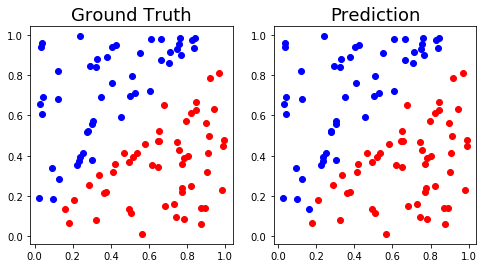

In [53]:
# learning rate = 0.1
if __name__ == "__main__":
    data_type = ['XOR', 'Linear']
    for d in data_type:
    
        X_train, y_train = GenData.fetch_data(d, 60)
        X_test, y_test = GenData.fetch_data(d, 20)

        net = SimpleNet([2, 30, 1], learning_rate=0.1)
        net.train(X_train, y_train, threshold=0.0001)
        
        print('='*15, d, '='*15)
        
        # Training (data leakage)
        y_pred = net.forward(X_train)
        print('train loss : ', loss(y_pred, y_train))
        print('train accuracy : {:.2f}%'.format(np.count_nonzero(np.round(y_pred) == y_train) * 100 / len(y_pred)))
        
        print('-' * 30)
        
        # Testing
        y_pred = net.forward(X_test)
        print('test loss : ', loss(y_pred, y_test))
        print('test accuracy : {:.2f}%'.format(np.count_nonzero(np.round(y_pred) == y_test) * 100 / len(y_pred)))
        SimpleNet.plot_result(X_test, y_test, np.round(y_pred))

## More hidden layers

### 10 layers with 4 neurons in each layer
* Might not converge
    * Gradient vanishing problem due to large saturation region of sigmoid function.
    * We could observe that loss never update from some early epochs.

[   0] loss : 0.1826 
[5000] loss : 0.1250 
[10000] loss : 0.1250 
[15000] loss : 0.1250 
[20000] loss : 0.1250 
[25000] loss : 0.1250 
[30000] loss : 0.1250 
[35000] loss : 0.1250 
[40000] loss : 0.1250 
[45000] loss : 0.1250 
[50000] loss : 0.1250 
[55000] loss : 0.1250 
[60000] loss : 0.1250 
[65000] loss : 0.1250 
[70000] loss : 0.1250 
[75000] loss : 0.1248 
[80000] loss : 0.1250 
[85000] loss : 0.1250 
[90000] loss : 0.1250 
[95000] loss : 0.1250 
=============== XOR ===============
train loss :  0.12499994651384234
train accuracy : 44.00%
------------------------------
test loss :  0.12499994651384234
test accuracy : 44.00%


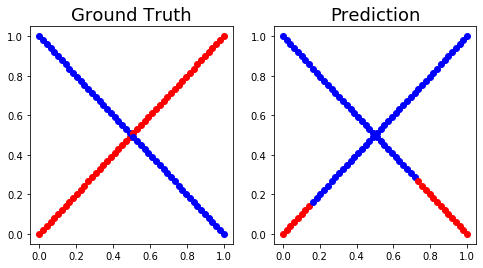

[   0] loss : 0.1830 
[5000] loss : 0.0349 
coverged
[6004] loss : 0.0001 
=============== Linear ===============
train loss :  9.968565633154976e-05
train accuracy : 100.00%
------------------------------
test loss :  0.004365349556528047
test accuracy : 99.00%


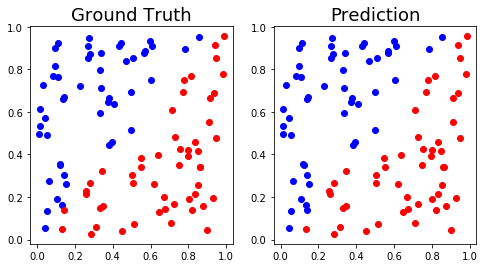

In [64]:
# learning rate = 0.1
if __name__ == "__main__":
    data_type = ['XOR', 'Linear']
    for d in data_type:
    
        X_train, y_train = GenData.fetch_data(d, 60)
        X_test, y_test = GenData.fetch_data(d, 20)

        net = SimpleNet([2,4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1], learning_rate=0.1)
        net.train(X_train, y_train, threshold=0.0001)
        
        print('='*15, d, '='*15)
        
        # Training (data leakage)
        y_pred = net.forward(X_train)
        print('train loss : ', loss(y_pred, y_train))
        print('train accuracy : {:.2f}%'.format(np.count_nonzero(np.round(y_pred) == y_train) * 100 / len(y_pred)))
        
        print('-' * 30)
        
        # Testing
        y_pred = net.forward(X_test)
        print('test loss : ', loss(y_pred, y_test))
        print('test accuracy : {:.2f}%'.format(np.count_nonzero(np.round(y_pred) == y_test) * 100 / len(y_pred)))
        SimpleNet.plot_result(X_test, y_test, np.round(y_pred))